In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


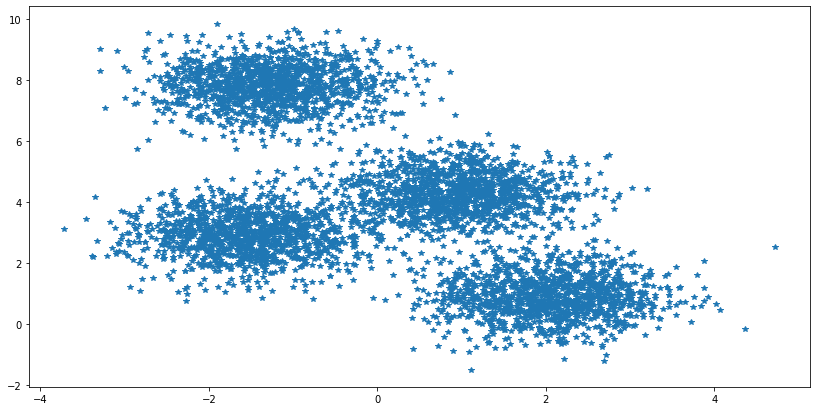

In [2]:
x,y_true=make_blobs(
n_samples=5000,
n_features=2,
centers=4,
cluster_std=0.7,
random_state=0    
)

plt.figure(figsize=(14,7))
plt.plot(x[:,0],x[:,1],ls='', marker='*')

plt.show()

In [3]:
from ipywidgets import interact,interactive,interact_manual,fixed

def cluster_update(cntr=(1,5),clsr_std=(0,1.0)):
    x,y_true=make_blobs(
    n_samples=5000,
    n_features=2,
    centers=cntr,
    cluster_std=clsr_std,
    random_state=0
    
    )

    plt.figure(figsize=(14,7))
    plt.plot(x[:,0],x[:,1],ls='', marker='.')

    plt.show()

interact(cluster_update)

interactive(children=(IntSlider(value=3, description='cntr', max=5, min=1), FloatSlider(value=0.5, description…

<function __main__.cluster_update(cntr=(1, 5), clsr_std=(0, 1.0))>

[[-1.27235945  7.81218608]
 [ 2.02861424  0.90963744]
 [-1.5410527   2.90404623]
 [ 0.95922654  4.30722919]]
[1 2 2 ... 0 0 0]
kmean_model.inertia_ 4674.253143778546


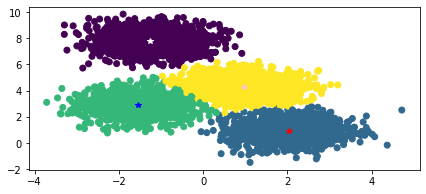

In [4]:
from sklearn.cluster import KMeans
kmean_model=KMeans(n_clusters=4)
kmean_model.fit(x)
print(kmean_model.cluster_centers_)
print(kmean_model.labels_)

print('kmean_model.inertia_',kmean_model.inertia_)

plt.figure(figsize=(7,3))
plt.plot(kmean_model.cluster_centers_[0,0],kmean_model.cluster_centers_[0,1],marker='*',color='white')
plt.plot(kmean_model.cluster_centers_[1,0],kmean_model.cluster_centers_[1,1],marker='*',color='red')
plt.plot(kmean_model.cluster_centers_[2,0],kmean_model.cluster_centers_[2,1],marker='*',color='blue')
plt.plot(kmean_model.cluster_centers_[3,0],kmean_model.cluster_centers_[3,1],marker='*',color='pink')


plt.scatter(x[:,0],x[:,1],marker='o',c=kmean_model.labels_)
plt.show()

num_clusters: 1 kmeans.inertia_: 47761.48435933943
num_clusters: 2 kmeans.inertia_: 20285.43531845767
num_clusters: 3 kmeans.inertia_: 9766.403257880269
num_clusters: 4 kmeans.inertia_: 4674.253143778546
num_clusters: 5 kmeans.inertia_: 4259.558699767025
num_clusters: 6 kmeans.inertia_: 3862.4689542130504
num_clusters: 7 kmeans.inertia_: 3464.9949229973645
num_clusters: 8 kmeans.inertia_: 3103.384563332448
num_clusters: 9 kmeans.inertia_: 2827.852299229045


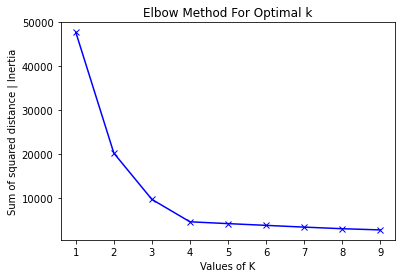

In [5]:
Sum_of_squared_distances=[]
K=range(1,10)
for num_clusters in K:
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(x)
    print('num_clusters:',num_clusters,'kmeans.inertia_:',kmeans.inertia_)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distance | Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


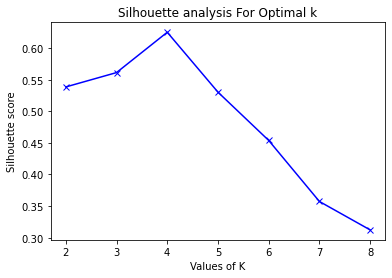

In [6]:
from sklearn.metrics import silhouette_score

range_n_clusters=[2,3,4,5,6,7,8]
silhouette_avg=[]
for num_clusters in range_n_clusters:
    
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(x)
    cluster_labels=kmeans.labels_
    
    silhouette_avg.append(silhouette_score(x,cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()